In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np
import time 
import random
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [2]:

# Import pygame module

u = np.zeros([2**3, 2**3])
shots = 100
dev = qml.device("default.qubit", wires= 12, shots = shots)

@qml.qnode(dev)

def circuit(x):

    for ii in range(len(x)):
            qml.RY(np.arccos(-2*x[ii]+1), ii)

    for ii in range(2**3):
        u[ii][ii-1] = 1

    for ii in range(8):
        qml.ControlledQubitUnitary(u, control_wires= ii, wires = [8,9,10])
    
    '''for ii in range(8):
    qml.ControlledQubitUnitary(u, control_wires= ii, wires = [8,9,10])'''

    qml.ctrl(qml.Hadamard, (8,9,10), control_values=(0,0,1))(11)
    
    qml.ctrl(qml.Hadamard, (8, 9, 10), control_values=(0,1,0))(11)

    qml.ctrl(qml.PauliX, (8, 9, 10), control_values=(0,1,1))(11)
    
    qml.ctrl(qml.RY, (8,9,10), control_values=(1,0,0))(np.arccos(-0.6), 11)
    
    qml.ctrl(qml.RY, (8,9,10), control_values=(1,0,1))(np.arccos(-0.2), 11)
 
    qml.ctrl(qml.RY, (8,9,10), control_values=(1,1,0))(np.arccos(0.2), 11)

    qml.ctrl(qml.RY, (8,9,10), control_values=(1,1,1))(np.arccos(0.6), 11)
    
    return qml.counts(wires = [11])

In [3]:
def get_surrounding(matrix, row, col):
    """Returns the surrounding and diagonal elements of an element in a matrix."""
    num_rows = len(matrix)
    num_cols = len(matrix[0])

    surrounding = []

    # Check top neighbor
    if row > 0:
        surrounding.append(matrix[row - 1][col])

        # Check top-left neighbor
        if col > 0:
            surrounding.append(matrix[row - 1][col - 1])

        # Check top-right neighbor
        if col < num_cols - 1:
            surrounding.append(matrix[row - 1][col + 1])

    # Check bottom neighbor
    if row < num_rows - 1:
        surrounding.append(matrix[row + 1][col])

        # Check bottom-left neighbor
        if col > 0:
            surrounding.append(matrix[row + 1][col - 1])

        # Check bottom-right neighbor
        if col < num_cols - 1:
            surrounding.append(matrix[row + 1][col + 1])

    # Check left neighbor
    if col > 0:
        surrounding.append(matrix[row][col - 1])

    # Check right neighbor
    if col < num_cols - 1:
        surrounding.append(matrix[row][col + 1])

    return surrounding


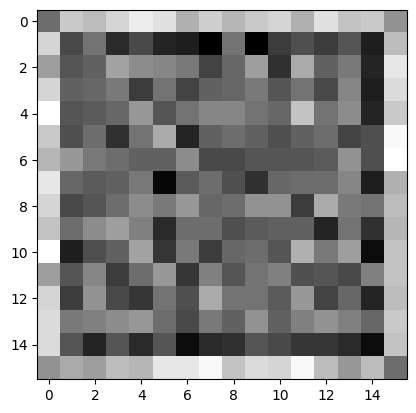

In [7]:
nimages = 120
nsize = 16
images = np.zeros([nimages, nsize, nsize])
cuad_res = np.zeros([nsize, nsize])
int_state = [[random.randint(0,1) for ii in range(nsize)] for jj in range(nsize)]
for t in range(nimages):
    for ii in range(nsize):
        for jj in range(nsize):
            v = np.array(get_surrounding(int_state, ii, jj))
            if len(v) < 8:
                v = np.concatenate((v, np.zeros(8-len(v))))
            res = circuit(v)
            if '1' in res:
                cuad_res[ii,jj] = res['1']/shots
            else:
                cuad_res[ii,jj] = (shots - res['0'])/shots
    plt.imshow(int_state, cmap = 'gray') 
    int_state = cuad_res
    images[:][:][t] = int_state       

..........................................

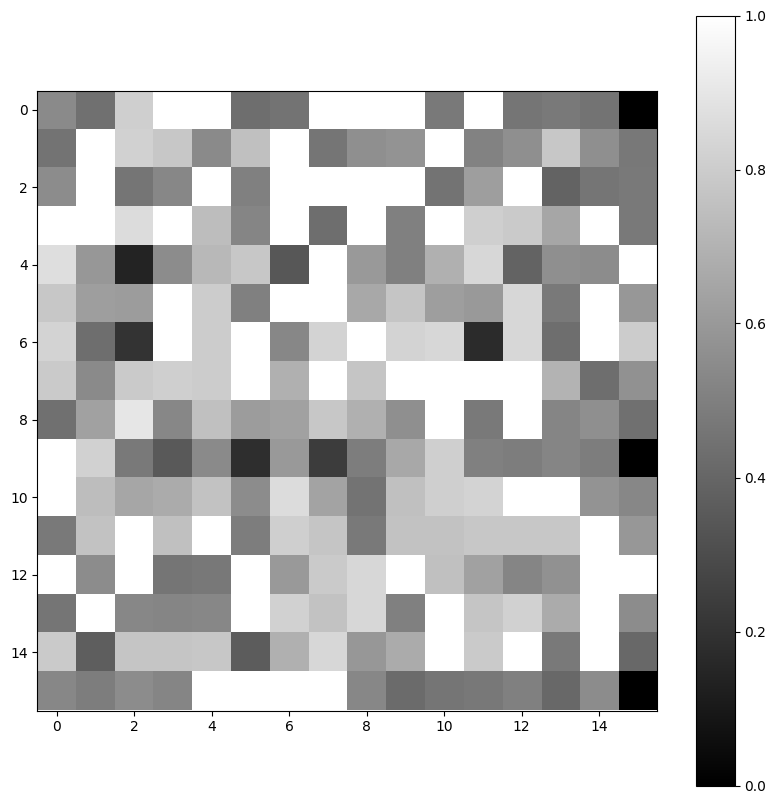

In [8]:
fps = 3
nSeconds = 40
snapshots = images
    
    # First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(10,10) )
    
a = snapshots[0,:,:]
im = plt.imshow(a, vmin=0, vmax=1, cmap = 'gray')
    
plt.colorbar(im)
    
def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    
    im.set_array(snapshots[i,:,:])
    return [im]
    
anim = animation.FuncAnimation( fig, 
                                animate_func, 
                                frames = nSeconds * fps,
                                interval = 100 / fps, # in ms
                                )
    
writergif = animation.PillowWriter(fps=fps)
anim.save('tfin200_18_30.gif', writer=writergif)